<a href="https://colab.research.google.com/github/jfernandezp/EjemploDataScience/blob/main/Copia_de_Lab_NLP_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><font size="5">NLP ANALYTICS</font></h1>

<h2> Objetivo </h2>

El objetivo del presente laboratorio es el de aplicar modelos de deep learning basados en <b>Language Modeling</b>. Para ello, utilizaremos pre-entrenados para poder realizar el proceso de predicción directamente desde un modelo potente.

<h2> Natural Language Toolkit </h2>


NLTK ó [Natural Language Toolkit](https://www.nltk.org/) es una plataforma líder para crear programas Python que funcionen con datos de lenguaje humano. Proporciona interfaces fáciles de usar para más de 50 corpora y recursos léxicos como WordNet, junto con un conjunto de bibliotecas de procesamiento de texto para clasificación, tokenización, derivación, etiquetado, análisis y razonamiento semántico, envoltorios para bibliotecas de PNL de nivel industrial, y un foro de discusión activo.


<img src="https://cdn-images-1.medium.com/max/800/1*jfZ4uK1Tko0TFugEk9oXDw.png" width="700" height="350">



Primero importamos la librería nltk y descargamos complementos

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Leemos el texto de interés de una página web

In [ ]:
import urllib.request
response =  urllib.request.urlopen('https://es.wikipedia.org/wiki/Teor%C3%ADa_de_juegos')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Teor\xc3\xada de juegos - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )eswikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"51e0293b-de01-4b38-8935-0a2eda6252a8","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Teor\xc3\xada_de_juegos","wgTitle":"Teor\xc3\xada de juegos","wgCurR

<h2> Beautiful Soup </h2> 

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) es una biblioteca de Python para extraer datos de archivos HTML y XML. Funciona con su analizador favorito para proporcionar formas idiomáticas de navegar, buscar y modificar el árbol de análisis. Por lo general, ahorra a los programadores horas o días de trabajo.

Le daremos formato a nuestro texto utilizando la librería beatifulSoup

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

Aprendizaje automático - Wikipedia, la enciclopedia libredocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"035578cf-eaa6-47a1-a40e-8c26698ac1f4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Aprendizaje_automático","wgTitle":"Aprendizaje automático","wgCurRevisionId":138808070,"wgRevisionId":138808070,"wgArticleId":154444,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Artículos con identificadores GND","Wikipedia:Artículos con identificadores LCCN","Wikipedia:Artículos con identificadores Microsoft Academic","Wikipedia:Páginas con enlaces mágicos de ISBN","Aprendizaje automático","

Tokenizamos la información

In [ ]:
tokens = [t for t in text.split()]
print(tokens)

['Aprendizaje', 'automático', '-', 'Wikipedia,', 'la', 'enciclopedia', 'libredocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","', '\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"035578cf-eaa6-47a1-a40e-8c26698ac1f4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Aprendizaje_automático","wgTitle":"Aprendizaje', 'automático","wgCurRevisionId":138808070,"wgRevisionId":138808070,"wgArticleId":154444,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Artículos', 'con', 'identificadores', 'GND","Wikipedia:Artículos', 'con', 'identificadores', 'LCCN","Wikipedia:Artículos', 'con', 'identificadores', 'Microsoft', 'Academic","Wikipedia:Págin

<b>Primer Análisis</b>, eliminamos stopwords y realizamos un cálculo de la frecuencia de las palabras, por último identificamos las palabras más utilizadas 

In [ ]:
from nltk.corpus import stopwords

sr = stopwords.words('spanish')
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))

    
freq.plot(20, cumulative=False)

También podemos complementar el listado de stopwords a nuestro juicio propio

Aprendizaje:5
automático:19
-:2
Wikipedia,:2
enciclopedia:2
libredocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t.",":1
\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"035578cf-eaa6-47a1-a40e-8c26698ac1f4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Aprendizaje_automático","wgTitle":"Aprendizaje:1
automático","wgCurRevisionId":138808070,"wgRevisionId":138808070,"wgArticleId":154444,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Artículos:1
identificadores:6
GND","Wikipedia:Artículos:1
LCCN","Wikipedia:Artículos:1
Microsoft:3
Academic","Wikipedia:Páginas:1
enlaces:3
mágicos:2
ISBN","Aprendizaje:1
automático","Inteligencia:1
artifi

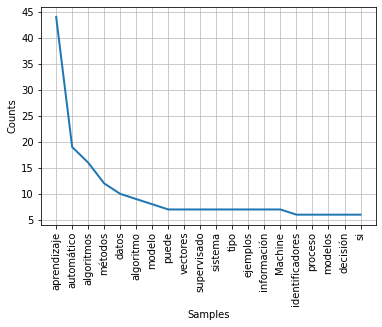

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('spanish') + ['ser','El','El','Los','1']
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('spanish') + ['ser','El','Los','1']:
        clean_tokens.remove(token)
        
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

# Sentiment Analysis

El <b>análisis de sentimientos</b> (o  <b>opinion mining</b>) utiliza el procesamiento del lenguaje natural (<b>Natural Language Processing</b>) y el machine learning para interpretar y clasificar las emociones en datos subjetivos. El análisis de opiniones se utiliza a menudo en los negocios para detectar opiniones en datos sociales, medir la reputación de la marca y comprender a los clientes.

<img src="https://monkeylearn.com/static/3ca10d6ce5dc6922836f278aef38f765/50bf7/what-is-sentiment-analysis6%402x.png" width="500">

<center><i>Fuente: https://monkeylearn.com/sentiment-analysis/</i></center>
<br><br>





<h2> Análisis de sentimientos con Textblob </h2> 

[TextBlob](https://textblob.readthedocs.io/en/dev/) es una biblioteca de Python (2 y 3) para procesar datos textuales. Proporciona una API simple para sumergirse en tareas comunes de procesamiento de lenguaje natural (NLP), como etiquetado de parte del discurso, extracción de frases nominales, análisis de sentimientos, clasificación, traducción y más.

<img src="https://textblob.readthedocs.io/en/dev/_static/textblob-logo.png" width="200">




Importamos librerías para tratamiendo de texto

In [ ]:
import tweepy
from textblob import TextBlob

Podemos identificar cada uno de los componentes de la oración

In [ ]:
txt_example = TextBlob("My music lesson is so fantastic")

In [ ]:
txt_example.tags

[('My', 'PRP$'),
 ('music', 'NN'),
 ('lesson', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('boring', 'JJ')]

In [ ]:
txt_example.words

WordList(['My', 'music', 'lesson', 'is', 'so', 'boring'])


<b>TextBlob</b> devuelve la polaridad y subjetividad de una oración. La <b>polaridad</b> se encuentra entre [-1,1], -1 define un sentimiento negativo y 1 define un sentimiento positivo. Las palabras de negación invierten la polaridad. 

<b>TextBlob</b>  tiene etiquetas semánticas que ayudan con el análisis detallado. Por ejemplo, emoticonos, signos de exclamación, emojis, etc. La subjetividad se encuentra entre [0,1]. La subjetividad cuantifica la cantidad de opinión personal e información fáctica contenida en el texto. La subjetividad más alta significa que el texto contiene opiniones personales en lugar de información fáctica. TextBlob tiene un parámetro más: la intensidad. 

<b>TextBlob</b>  calcula la subjetividad observando la "intensidad". La intensidad determina si una palabra modifica la siguiente. Para el inglés, los adverbios se utilizan como modificadores ("muy bueno").

Finalmente podemos realizar un análisis de la polaridad del sentimiento del texto

In [ ]:
txt_example.sentiment.polarity

0.4

# Social media Sentiment Analytics 

Para esto necesitaremos permisos de acceso de investigador a fuentes de social media.

In [ ]:
consumer_key = 'BpMa47xMrhrdg3VnII49WR3lQ'
consumer_secret = '6PTzrDT9wkb3OMG4zKel7mioGKobNDcyPjLX0r5P2Mw0a6rQgB'

access_token = '1865754584-Cnai3Umxlur73nWuTLjerjpX2C2G15Z4BTHxX4K'
access_token_secret = 'qQU1QLdn936VdfHknmGBKizDNDWCMp4fFDpeRhuQFd2yP'


Seteando usuario

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

Para comenzar, importaremos los 200 últimos tweets referentes a un tópico particular

In [ ]:
public_tweets = api.user_timeline('Netflix', count = 200)


In [ ]:
public_tweets

[Status(_api=<tweepy.api.API object at 0x7f44358faa90>, _json={'created_at': 'Thu Oct 07 00:32:44 +0000 2021', 'id': 1445909926019145729, 'id_str': '1445909926019145729', 'text': 'Finished Squid Game?  \n\nThen check out Alice in Borderland — a thrilling series that also revolves around a series… https://t.co/NdhWcC2Wjn', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NdhWcC2Wjn', 'expanded_url': 'https://twitter.com/i/web/status/1445909926019145729', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 16573941, 'id_str': '16573941', 'name': 'Netflix', 'screen_name': 'netflix', 'location': 'California, USA', 'description': 'No. 456 

Y aplicaremos nuestro análisis de polaridad

In [ ]:
for tweet in public_tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment.polarity)

Finished Squid Game?  

Then check out Alice in Borderland — a thrilling series that also revolves around a series… https://t.co/NdhWcC2Wjn
-0.07500000000000001
RT @GeneralWarPHare: If you loved “Squid Game” then check out this gem on @Netflix https://t.co/MD5BHYe4S1
0.14999999999999997
@styrofoamplates https://t.co/dnRI2s8dwd
0.0
@thnatophobia if you stay ready, you dont have to get ready.
0.2
@romello_jordan https://t.co/086ZUE0WOR
0.0
@Greymattersplat allow me to send some zen instead https://t.co/rdmnC0OUVi
0.0
We filmed the cast of There's Someone Inside Your House watching the film for the first time https://t.co/SydEwryUqB
0.25
@caylendood sorry! say hi to Jayden for me
-0.625
RT @NetflixFilm: Your secrets 

                       might get

                                         you killed

A new slasher staple…
-0.03181818181818183
Maid is often at its best when it's simply Margaret Qualley brilliantly delivering a powerful monologue. https://t.co/hxlEbntCsT
0.54999999999999

In [ ]:
len(public_tweets)

200

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['SCORE'])

In [ ]:
equation = pd.Series([])

for tweet in public_tweets:
  analysis = TextBlob(tweet.text)
  a = analysis.sentiment.polarity
  equation = equation.append(pd.Series(a))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
df['SCORE'] = equation
df.head(10)

SCORE
0 -0.075000
0  0.150000
0  0.000000
0  0.200000
0  0.000000
0  0.000000
0  0.250000
0 -0.625000
0 -0.031818
0  0.550000

SCORE
count  200.000000
mean     0.132390
std      0.330010
min     -1.000000
25%      0.000000
50%      0.000000
75%      0.300635
max      1.000000

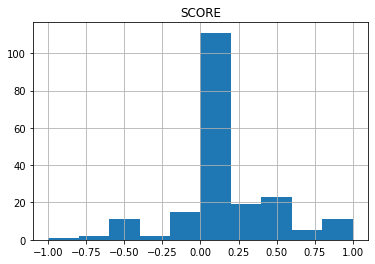

In [ ]:
df.hist()
df.describe()

#Analizando estadisticas de Netflix

In [ ]:
userID = "Netflix"

In [ ]:
# Credenciales de Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweets = api.user_timeline(screen_name=userID, 
                           # 200 es el recuento máximo permitido
                           count=200,
                           include_rts = False,
                           # Necesario para mantener full_text
                           # de lo contrario, solo se extraen las primeras 140 palabras
                           tweet_mode = 'extended'
                           )

In [ ]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1445909926019145729
2021-10-07 00:32:44
Finished Squid Game?  

Then check out Alice in Borderland — a thrilling series that also revolves around a series of deadly games but with a science fiction twist! 
https://t.co/lTel3xXF98


ID: 1445887763388063755
2021-10-06 23:04:40
@styrofoamplates https://t.co/dnRI2s8dwd


ID: 1445883617050169352
2021-10-06 22:48:12
@thnatophobia if you stay ready, you dont have to get ready.




Dado que el solamente se nos permite extraer 200 tweets, crearemos un proceso iterativo que nos permitirá extraer bloques de 200 en 200

In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 es el recuento máximo permitido
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necesario para mantener full_text
                           # de lo contrario, solo se extraen las primeras 140 palabras
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 228
N of tweets downloaded till now 340
N of tweets downloaded till now 438
N of tweets downloaded till now 549
N of tweets downloaded till now 659
N of tweets downloaded till now 765
N of tweets downloaded till now 871
N of tweets downloaded till now 956
N of tweets downloaded till now 1059
N of tweets downloaded till now 1159
N of tweets downloaded till now 1265
N of tweets downloaded till now 1359
N of tweets downloaded till now 1445
N of tweets downloaded till now 1547
N of tweets downloaded till now 1648
N of tweets downloaded till now 1684


In [ ]:
#transformamos los tweets en un 2D array que será enviado a csv	
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx, tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(20)

id  ...                                               text
0   1445909926019145729  ...  Finished Squid Game?  \n\nThen check out Alice...
1   1445887763388063755  ...           @styrofoamplates https://t.co/dnRI2s8dwd
2   1445883617050169352  ...  @thnatophobia if you stay ready, you dont have...
3   1445883520111427586  ...            @romello_jordan https://t.co/086ZUE0WOR
4   1445883177432612868  ...  @Greymattersplat allow me to send some zen ins...
5   1445882811844489217  ...  We filmed the cast of There's Someone Inside Y...
6   1445882792236105730  ...         @caylendood sorry! say hi to Jayden for me
7   1445870482901790722  ...  Maid is often at its best when it's simply Mar...
8   1445862871162781696  ...  @vulture @e_alexjung love this interview with ...
9   1445843963093549060  ...  Ginnifer Goodwin, Kate Hudson, John Krasinski,...
10  1445819705789353986  ...  Vanessa Hudgens, Vanessa Hudgens, and Vanessa ...
11  1445765800548356096  ...  New demons, new magic, new Locke &amp; Key.\n\...
12  1445759561147695107  ...  Mike Flanagan has more scares headed to Netfli...
13  1445534354025828352  ...  Me in a job                     Me when I \n i...
14  1445507013262262272  ...                       @LadyKalma we aim to please!
15  1445505832934731780  ...  Raymond Ablack from Ginny &amp; Georgia also c...
16  1445489341862539269  ...  Mae Whitman stars in The DUFF, a delightfully ...
17  1445472845404930053  ...               @jarpad zero apologies required, sir
18  1445472593604055040  ...  @metheridge Come to my window\nCrawl inside\nW...
19  1445471301586460673  ...  American Horror Story: Murder House premiered ...

[20 rows x 5 columns]

Realizaremos nuestro primer análisis observando la popularidad del tema

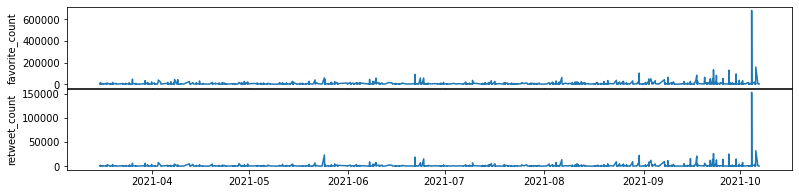

In [ ]:
import matplotlib.pyplot as plt

ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [ ]:
import pandas as pd
dfSent = pd.DataFrame(columns=['SCORE'])

equation = pd.Series([])

for tweet in df.text:
  analysis = TextBlob(tweet)
  a = analysis.sentiment.polarity
  equation = equation.append(pd.Series(a))

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [ ]:
dfSent['SCORE'] = equation
dfSent.head()

SCORE
0  0.589583
0  0.083333
0  0.000000
0  0.000000
0  0.050000

SCORE
count  1652.000000
mean      0.134227
std       0.269332
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.285714
max       1.000000

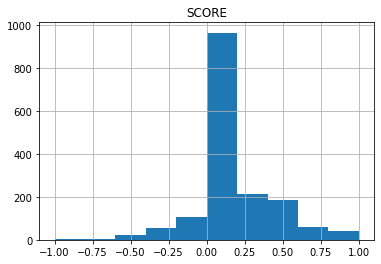

In [ ]:
dfSent.hist()
dfSent.describe()